In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Titanic dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# let's visualise the percentage of missing values
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Three of the variables contain missing data, Age (20%), Cabin (77%) and Embarked (< 1%)

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


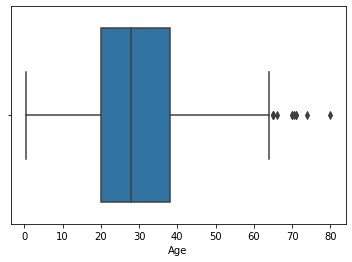

In [5]:
sns.boxplot(data['Age'])

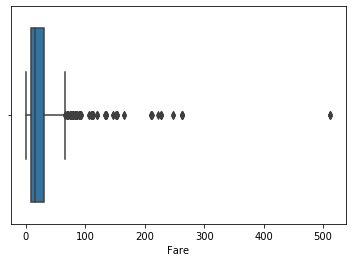

In [6]:
sns.boxplot(data['Fare'])

In [7]:
# first we plot the distributions to find out if they are Gaussian or skewed.
# Depending on the distribution, we will use the normal assumption or the interquantile
# range to find outliers
# if normal distributed = gaussian nd if skewed = interquantile

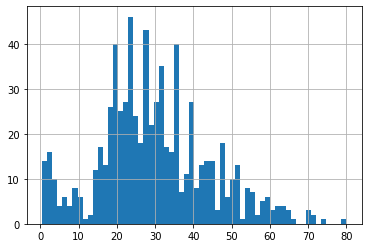

In [8]:
data['Age'].hist(bins=60)

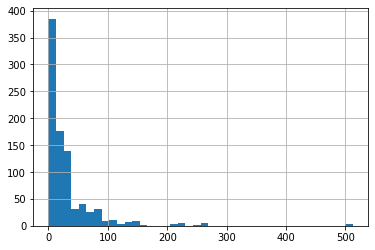

In [9]:
data['Fare'].hist(bins=40)

Age is quite Gaussian and Fare is skewed, so I will use the Gaussian assumption for Age, and the interquantile range for Fare

In [10]:
# find outliers
# Age
Upper_boundary = data.Age.mean() + 3* data.Age.std()
Lower_boundary = data.Age.mean() - 3* data.Age.std()
# Fare
IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)
Lower_fence = data.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = data.Fare.quantile(0.75) + (IQR * 3)

In [11]:
print('value of age',Upper_boundary , Lower_boundary)
print('value of fare',Upper_fence , Lower_fence )

value of age 73.27860964406095 -13.88037434994331
value of fare 100.2688 -61.358399999999996


We should remove from the dataset Ages > 73 or Fares > 100

In [12]:
data.drop(data[data['Age']>79].index,inplace=True)
data.drop(data[data['Fare']>500].index,inplace=True)

In [13]:
data['Age']=np.where((data['SibSp']==8)& (data['Age'].isnull()),28.0,data['Age'])
data['Age']=np.where((data['SibSp']==0)& (data['Age'].isnull()),29.0,data['Age'])
data['Age']=np.where((data['SibSp']==1)& (data['Age'].isnull()),30.0,data['Age'])
data['Age']=np.where((data['SibSp']==2)& (data['Age'].isnull()),23.0,data['Age'])
data['Age']=np.where((data['SibSp']==3)& (data['Age'].isnull()),10.0,data['Age'])

In [14]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [15]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         0
dtype: int64

In [16]:
data.drop(['Cabin','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [17]:
df_num= data[data.select_dtypes(include=np.number).columns]
df_cat= data[data.select_dtypes(include='object').columns]
df_dummy= pd.get_dummies(df_cat)
df =pd.concat([df_num,df_dummy],axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [18]:
df.drop(['Sex_female','Embarked_C'],axis=1,inplace=True)

In [19]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [20]:
x = df.iloc[:,1:8]
y = df.iloc[:,0]

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

C:\Users\Ashish\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

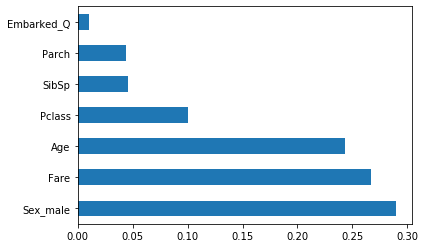

In [22]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=8)
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred = log.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log.score(x_test, y_test)))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(log.score(x_train, y_train)))

C:\Users\Ashish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.80
Accuracy of logistic regression classifier on train set: 0.81


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[143  24]
 [ 30  70]]


In [26]:
import statsmodels.api as sm

In [27]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.496975
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  887
Model:                          Logit   Df Residuals:                      880
Method:                           MLE   Df Model:                            6
Date:                Wed, 16 Sep 2020   Pseudo R-squ.:                  0.2522
Time:                        12:58:59   Log-Likelihood:                -440.82
converged:                       True   LL-Null:                       -589.48
Covariance Type:            nonrobust   LLR p-value:                 3.050e-61
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.0950      0.073      1.297      0.195      -0.049       0.239
Age            0.0058      0.

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
grid = GridSearchCV(log,{'C':[.001,0.1,0.01,10,0.9]})
grid.fit(x_train,y_train)
grid.best_params_

C:\Users\Ashish\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Ashish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chang

{'C': 0.1}

In [30]:
grid.best_score_

0.8016129032258065

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       167
           1       0.74      0.70      0.72       100

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267

